In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D

In [3]:
cifar = tf.keras.datasets.cifar10

(xtrain,ytrain), (xtest,ytest) = cifar.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
ytrain,ytest = ytrain.flatten(), ytest.flatten()

170508288/170498071 [==============================] - 65s 0us/step


In [4]:
K = len(set(ytrain))
K

10

In [8]:
## Building model using Functional API

i = Input(shape = xtrain[0].shape)
x = Conv2D(32, (3,3), strides=2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides=2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [9]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(xtrain,ytrain, validation_data = (xtest,ytest), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 45s 19ms/step - loss: 1.5352 - accuracy: 0.4374 - val_loss: 1.2637 - val_accuracy: 0.5388
Epoch 2/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2062 - accuracy: 0.5681 - val_loss: 1.0876 - val_accuracy: 0.6151
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0475 - accuracy: 0.6269 - val_loss: 1.0001 - val_accuracy: 0.6459
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9342 - accuracy: 0.6692 - val_loss: 0.9662 - val_accuracy: 0.6518
Epoch 5/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8376 - accuracy: 0.7018 - val_loss: 0.8768 - val_accuracy: 0.6945
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7573 - accuracy: 0.7306 - val_loss: 0.8867 - val_accuracy: 0.6883
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6869 - accuracy: 0.7552 - val_loss: 0.8480 -

In [10]:
xtrain.shape

(50000, 32, 32, 3)

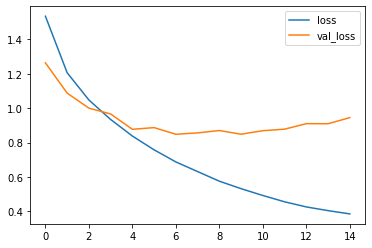

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

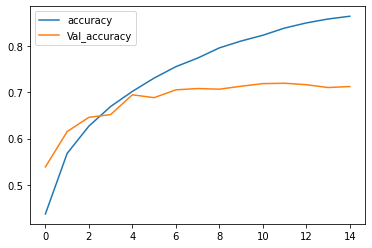

In [14]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'Val_accuracy')
plt.legend()

In [16]:
from tensorflow.keras.layers import BatchNormalization , MaxPooling2D

In [17]:
# Building model using functional API with Pooling

i = Input(shape = xtrain[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(xtrain,ytrain, validation_data = (xtest,ytest), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 277s 175ms/step - loss: 1.2865 - accuracy: 0.5545 - val_loss: 0.9737 - val_accuracy: 0.6626
Epoch 2/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.8456 - accuracy: 0.7067 - val_loss: 0.8880 - val_accuracy: 0.6983
Epoch 3/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.6864 - accuracy: 0.7645 - val_loss: 1.0005 - val_accuracy: 0.6681
Epoch 4/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.5819 - accuracy: 0.7999 - val_loss: 0.6838 - val_accuracy: 0.7800
Epoch 5/15
1563/1563 [==============================] - 275s 176ms/step - loss: 0.4963 - accuracy: 0.8295 - val_loss: 0.6933 - val_accuracy: 0.7749
Epoch 6/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.4247 - accuracy: 0.8553 - val_loss: 0.6283 - val_accuracy: 0.8015
Epoch 7/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.3547 - accuracy: 0.8784 - val_